In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
!unzip "/content/gdrive/My Drive/datasets/earth_data.zip" -d "./"

Archive:  /content/gdrive/My Drive/datasets/earth_data.zip
replace ./earth_data.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
!ls

earth_data.h5	    features_val.npy  models	   trainY.npy
features_train.npy  gdrive	      sample_data  valY.npy


In [9]:
import numpy as np
import h5py
import os
import numpy as np
import h5py
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns
# -*- coding: utf-8 -*-
import os
import numpy as np
import h5py
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

save_dir = './models/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print("Directory created!")
else:
    print("Directory already exists!")

def loadDataH5():


    with h5py.File('earth_data.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

# This data has not been normalized
trainX, trainY, valX, valY = loadDataH5()



Directory already exists!
(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)


Question1: initialize VGG model then pair it up with 4 ML algorithms, Random Forest, XGBoost, Logistic Regression and svm

In [12]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


Freeze all convolutional layers to prevent updating during training.


In [13]:
for layer in vgg_model.layers:
    layer.trainable = False


In [ ]:
features_train = vgg_model.predict(trainX)
features_val = vgg_model.predict(valX)


 26/600 ━━━━━━━━━━━━━━━━━━━━ 15:08 2s/step

flattening the model

In [21]:
features_train = features_train.reshape((features_train.shape[0], -1))
features_val = features_val.reshape((features_val.shape[0], -1))


In [10]:
import numpy as np

np.save('features_train.npy', features_train)
np.save('features_val.npy', features_val)
np.save('trainY.npy', trainY)
np.save('valY.npy', valY)

print("Features and labels saved successfully!")


NameError: name 'features_train' is not defined

Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(features_train, trainY)

# Predict and calculate accuracy
preds = log_reg.predict(features_val)
accuracy = accuracy_score(valY, preds)
print(f"Logistic Regression Validation Accuracy: {accuracy:.4f}")

# Save model and predictions
joblib.dump(log_reg, "logistic_regression_model.pkl")
np.save('logistic_preds.npy', preds)
np.save('logistic_accuracy.npy', np.array([accuracy]))

print("Model and results saved successfully!")
results = {
    "Logistic Regression Accuracy": accuracy,
}

print(results)
# Save results as JSON
import json
with open('model_results.json', 'w') as f:
    json.dump(results, f)

print("Results saved to model_results.json")



NameError: name 'features_train' is not defined

Random Forest below

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import json

# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features_train, trainY)

# Predict on validation data
rf_preds = rf.predict(features_val)

# Calculate accuracy
rf_accuracy = accuracy_score(valY, rf_preds)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.4f}")

# Save the model and predictions
joblib.dump(rf, "random_forest_model.pkl")
np.save('rf_preds.npy', rf_preds)
np.save('rf_accuracy.npy', np.array([rf_accuracy]))

print("Random Forest model and results saved successfully!")



Random Forest Validation Accuracy: 0.8594
Random Forest model and results saved successfully!


 SVM model

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import json

# Train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(features_train, trainY)

# Predict on validation data
svm_preds = svm.predict(features_val)

# Calculate accuracy
svm_accuracy = accuracy_score(valY, svm_preds)
print(f"SVM Validation Accuracy: {svm_accuracy:.4f}")

# Save the model and predictions
joblib.dump(svm, "svm_model.pkl")
np.save('svm_preds.npy', svm_preds)
np.save('svm_accuracy.npy', np.array([svm_accuracy]))

print("SVM model and results saved successfully!")


SVM Validation Accuracy: 0.8898
SVM model and results saved successfully!


XGBOOST

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib
import json

# Initialize the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb.fit(features_train, trainY)

# Predict on validation data
xgb_preds = xgb.predict(features_val)

# Calculate accuracy
xgb_accuracy = accuracy_score(valY, xgb_preds)
print(f"XGBoost Validation Accuracy: {xgb_accuracy:.4f}")

# Save the model and predictions
joblib.dump(xgb, "xgboost_model.pkl")
np.save('xgb_preds.npy', xgb_preds)
np.save('xgb_accuracy.npy', np.array([xgb_accuracy]))

print("XGBoost model and results saved successfully!")


Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x792a992276d0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 582, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


XGBoostError: [23:01:21] /workspace/src/common/quantile.h:770: Check failed: count <= total_entries (19200 vs. 0) : 
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x792a53a5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x37968f) [0x792a53b7968f]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x379b15) [0x792a53b79b15]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x545d5e) [0x792a53d45d5e]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x54a7d2) [0x792a53d4a7d2]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x54b99c) [0x792a53d4b99c]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4fb3ea) [0x792a53cfb3ea]
  [bt] (7) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x18c) [0x792a53973a5c]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x792b76330e2e]



evaluate accuracy for all ML models and compare


Logistic Regression Evaluation Metrics:
Accuracy: 0.8765
Precision: 0.8774
Recall: 0.8765
F1 Score: 0.8767

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       600
           1       0.95      0.96      0.96       600
           2       0.90      0.87      0.88       600
           3       0.77      0.81      0.79       500
           4       0.93      0.90      0.92       500
           5       0.84      0.88      0.85       400
           6       0.80      0.82      0.81       500
           7       0.94      0.94      0.94       600
           8       0.84      0.80      0.82       500

    accuracy                           0.88      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.88      0.88      0.88      4800



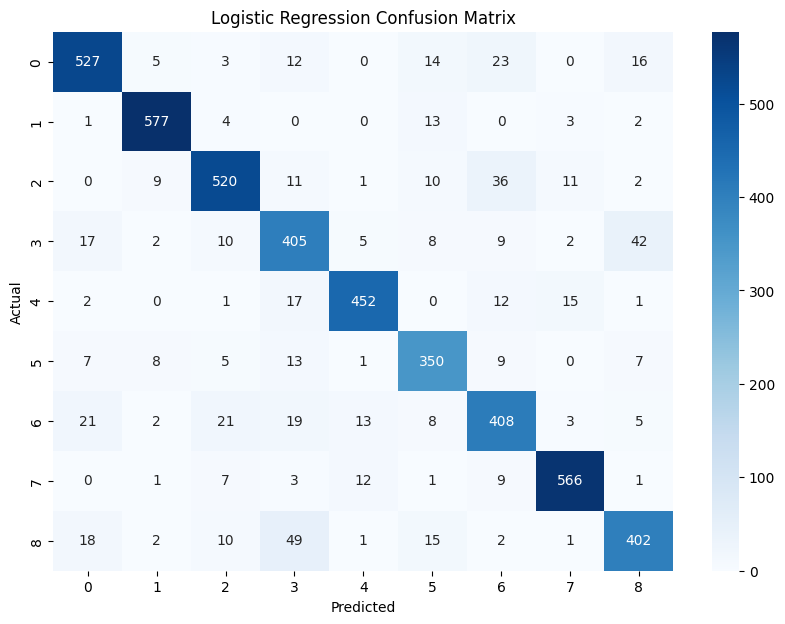


Random Forest Evaluation Metrics:
Accuracy: 0.8594
Precision: 0.8584
Recall: 0.8594
F1 Score: 0.8576

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       600
           1       0.93      0.97      0.95       600
           2       0.86      0.91      0.89       600
           3       0.78      0.70      0.74       500
           4       0.84      0.92      0.88       500
           5       0.85      0.84      0.85       400
           6       0.88      0.74      0.81       500
           7       0.91      0.92      0.91       600
           8       0.81      0.76      0.78       500

    accuracy                           0.86      4800
   macro avg       0.86      0.85      0.85      4800
weighted avg       0.86      0.86      0.86      4800



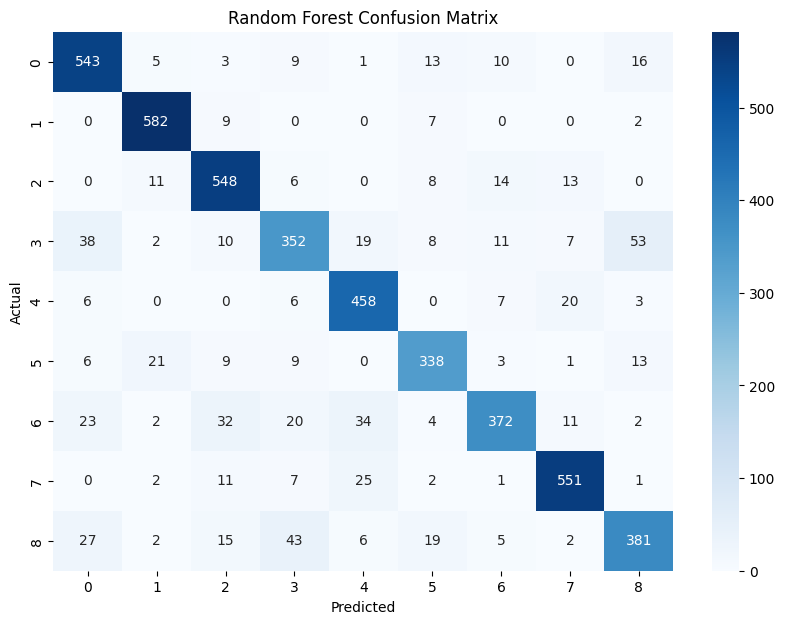


SVM Evaluation Metrics:
Accuracy: 0.8898
Precision: 0.8904
Recall: 0.8898
F1 Score: 0.8899

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       600
           1       0.97      0.96      0.97       600
           2       0.89      0.89      0.89       600
           3       0.79      0.84      0.82       500
           4       0.93      0.92      0.93       500
           5       0.86      0.89      0.87       400
           6       0.84      0.83      0.84       500
           7       0.96      0.95      0.95       600
           8       0.85      0.80      0.83       500

    accuracy                           0.89      4800
   macro avg       0.89      0.89      0.89      4800
weighted avg       0.89      0.89      0.89      4800



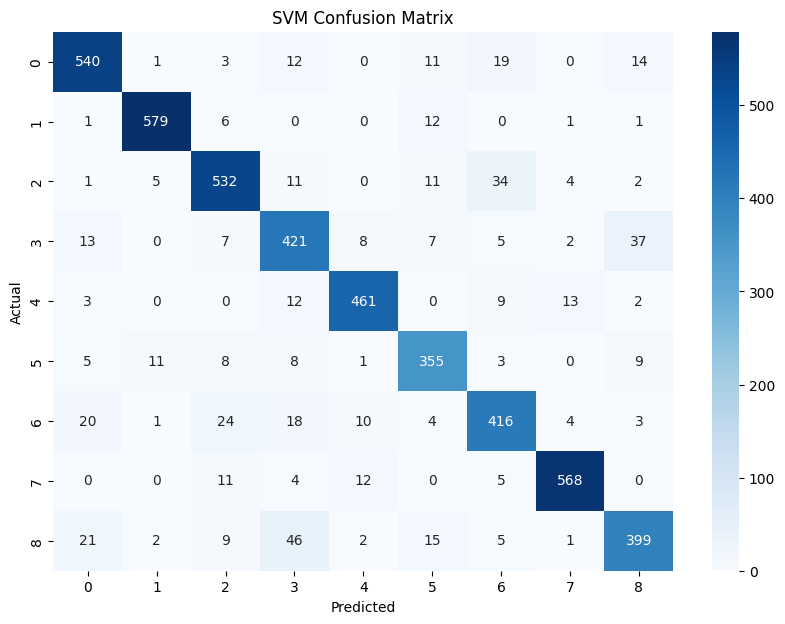

All evaluation metrics updated in model_results.json


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Unified function to evaluate and compare models
def evaluate_all_models(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save metrics to JSON
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    return metrics

# Evaluate Logistic Regression
log_reg_metrics = evaluate_all_models("Logistic Regression", valY, preds)

# Evaluate Random Forest
rf_metrics = evaluate_all_models("Random Forest", valY, rf_preds)

# Evaluate SVM
svm_metrics = evaluate_all_models("SVM", valY, svm_preds)

# Update the results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

results["Logistic Regression Metrics"] = log_reg_metrics
results["Random Forest Metrics"] = rf_metrics
results["SVM Metrics"] = svm_metrics

with open('model_results.json', 'w') as f:
    json.dump(results, f)

print("All evaluation metrics updated in model_results.json")


Question 2: Load data and normalize, then convert to categorical to ensure it works with the model

In [26]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import h5py

def loadDataH5():
    with h5py.File('earth_data.h5', 'r') as hf:
        trainX = np.array(hf.get('trainX')) / 255.0
        trainY = to_categorical(np.array(hf.get('trainY')), num_classes=9)
        valX = np.array(hf.get('valX')) / 255.0
        valY = to_categorical(np.array(hf.get('valY')), num_classes=9)
    return trainX, trainY, valX, valY

trainX, trainY, valX, valY = loadDataH5()
print(f"Training labels shape: {trainY.shape}")
print(f"Validation labels shape: {valY.shape}")


Training labels shape: (19200, 9)
Validation labels shape: (4800, 9)


Model customization as part of model tuning  , adding layers and compiling model

In [27]:


from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load VGG16 without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze all layers except the last convolutional block (block5)
for layer in base_model.layers:
    if 'block5' not in layer.name:
        layer.trainable = False
    else:
        layer.trainable = True

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a low learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,848,329 (56.64 MB)

 Trainable params: 7,213,065 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Apply Data Augmentation as part of fine tuning

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow(trainX, trainY, batch_size=32)


train the model

In [29]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=(valX, valY),
    callbacks=[early_stopping],
    verbose=1
)

# Save the model
model.save('fine_tuned_vgg16_variant1.h5')


Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1552s 3s/step - accuracy: 0.2786 - loss: 2.0365 - val_accuracy: 0.7635 - val_loss: 0.7710
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1570s 3s/step - accuracy: 0.6486 - loss: 1.0292 - val_accuracy: 0.8233 - val_loss: 0.5621
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1570s 3s/step - accuracy: 0.7331 - loss: 0.7969 - val_accuracy: 0.8477 - val_loss: 0.4785
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1552s 3s/step - accuracy: 0.7844 - loss: 0.6669 - val_accuracy: 0.8640 - val_loss: 0.4185
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1579s 3s/step - accuracy: 0.8033 - loss: 0.6095 - val_accuracy: 0.8798 - val_loss: 0.3681
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1577s 3s/step - accuracy: 0.8242 - loss: 0.5610 - val_accuracy: 0.8865 - val_loss: 0.3506
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1550s 3s/step - accuracy: 0.8352 - loss: 0.5098 - val_accuracy: 0.8777 - val_loss: 0.3886
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1553s 3s/step - accuracy: 0.8473 - loss: 0.4729 - 

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Unfreeze the last two convolutional blocks
for layer in base_model.layers:
    if 'block4' in layer.name or 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,848,329 (56.64 MB)

 Trainable params: 13,112,841 (50.02 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

data augmentation two layers

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow(trainX, trainY, batch_size=32)


model trainning

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=(valX, valY),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

print("\n--- Training Complete ---")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3206 - loss: 1.9441
Epoch 1: val_accuracy improved from -inf to 0.76938, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2394s 4s/step - accuracy: 0.3208 - loss: 1.9434 - val_accuracy: 0.7694 - val_loss: 0.7441
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6929 - loss: 0.9054
Epoch 2: val_accuracy improved from 0.76938 to 0.84125, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2400s 4s/step - accuracy: 0.6929 - loss: 0.9053 - val_accuracy: 0.8413 - val_loss: 0.4791
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8059 - loss: 0.6039
Epoch 3: val_accuracy improved from 0.84125 to 0.86813, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2379s 4s/step - accuracy: 0.8059 - loss: 0.6038 - val_accuracy: 0.8681 - val_loss: 0.4369
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8603 - loss: 0.4647
Epoch 4: val_accuracy improved from 0.86813 to 0.88833, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2360s 4s/step - accuracy: 0.8603 - loss: 0.4647 - val_accuracy: 0.8883 - val_loss: 0.3690
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8795 - loss: 0.4000
Epoch 5: val_accuracy improved from 0.88833 to 0.92208, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2372s 4s/step - accuracy: 0.8795 - loss: 0.4001 - val_accuracy: 0.9221 - val_loss: 0.2612
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8907 - loss: 0.3541
Epoch 6: val_accuracy did not improve from 0.92208
600/600 ━━━━━━━━━━━━━━━━━━━━ 2405s 4s/step - accuracy: 0.8907 - loss: 0.3541 - val_accuracy: 0.9108 - val_loss: 0.2826
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8987 - loss: 0.3374
Epoch 7: val_accuracy improved from 0.92208 to 0.92563, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2361s 4s/step - accuracy: 0.8987 - loss: 0.3374 - val_accuracy: 0.9256 - val_loss: 0.2378
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9065 - loss: 0.3059
Epoch 8: val_accuracy did not improve from 0.92563
600/600 ━━━━━━━━━━━━━━━━━━━━ 2371s 4s/step - accuracy: 0.9065 - loss: 0.3059 - val_accuracy: 0.9035 - val_loss: 0.3151
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9142 - loss: 0.2882
Epoch 9: val_accuracy did not improve from 0.92563
600/600 ━━━━━━━━━━━━━━━━━━━━ 2350s 4s/step - accuracy: 0.9142 - loss: 0.2882 - val_accuracy: 0.9181 - val_loss: 0.2561
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9268 - loss: 0.2429
Epoch 10: val_accuracy did not improve from 0.92563
600/600 ━━━━━━━━━━━━━━━━━━━━ 2461s 4s/step - accuracy: 0.9268 - loss: 0.2429 - val_accuracy: 0.9225 - val_loss: 0.2561
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9218 - loss: 0.2567
Epoch 11: val_accuracy impro

600/600 ━━━━━━━━━━━━━━━━━━━━ 2373s 4s/step - accuracy: 0.9218 - loss: 0.2567 - val_accuracy: 0.9327 - val_loss: 0.2354
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9279 - loss: 0.2381
Epoch 12: val_accuracy improved from 0.93271 to 0.94042, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2438s 4s/step - accuracy: 0.9279 - loss: 0.2381 - val_accuracy: 0.9404 - val_loss: 0.2018
Epoch 13/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9298 - loss: 0.2261
Epoch 13: val_accuracy did not improve from 0.94042
600/600 ━━━━━━━━━━━━━━━━━━━━ 2487s 4s/step - accuracy: 0.9298 - loss: 0.2261 - val_accuracy: 0.9254 - val_loss: 0.2468
Epoch 14/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9361 - loss: 0.2061
Epoch 14: val_accuracy did not improve from 0.94042
600/600 ━━━━━━━━━━━━━━━━━━━━ 2447s 4s/step - accuracy: 0.9361 - loss: 0.2061 - val_accuracy: 0.9292 - val_loss: 0.2398
Epoch 15/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9388 - loss: 0.2002
Epoch 15: val_accuracy did not improve from 0.94042
600/600 ━━━━━━━━━━━━━━━━━━━━ 2401s 4s/step - accuracy: 0.9388 - loss: 0.2002 - val_accuracy: 0.9398 - val_loss: 0.1993
Epoch 16/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9419 - loss: 0.1890
Epoch 16: val_accuracy i

600/600 ━━━━━━━━━━━━━━━━━━━━ 2443s 4s/step - accuracy: 0.9419 - loss: 0.1890 - val_accuracy: 0.9406 - val_loss: 0.1996
Epoch 17/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9420 - loss: 0.1905
Epoch 17: val_accuracy improved from 0.94063 to 0.94250, saving model to /content/drive/MyDrive/Variant2/best_model.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2376s 4s/step - accuracy: 0.9420 - loss: 0.1905 - val_accuracy: 0.9425 - val_loss: 0.1957
Epoch 18/20
 48/600 ━━━━━━━━━━━━━━━━━━━━ 33:01 4s/step - accuracy: 0.9603 - loss: 0.1362

data augmentation one layer without scheduler

In [26]:
def loadDataH5():
    with h5py.File('earth_data.h5', 'r') as hf:
        trainX = np.array(hf.get('trainX')) / 255.0
        trainY = to_categorical(np.array(hf.get('trainY')), num_classes=9)
        valX = np.array(hf.get('valX')) / 255.0
        valY = to_categorical(np.array(hf.get('valY')), num_classes=9)
    return trainX, trainY, valX, valY

trainX, trainY, valX, valY = loadDataH5()
print(f"Training labels shape: {trainY.shape}")
print(f"Validation labels shape: {valY.shape}")
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
train_generator = datagen.flow(trainX, trainY, batch_size=32)
# Fine-Tuning VGG16 (Block 5 Only) without Scheduler
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Model Architecture
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath=os.path.join(save_dir, 'fine_tuned_vgg16_variantA.h5'), save_best_only=True, monitor='val_accuracy', mode='max')

# Training
print("\n--- Fine-Tuning Block 5 Only (Without Scheduler) ---")
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=(valX, valY),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

print("\n--- Training Complete (No Scheduler) ---")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")


Training labels shape: (19200, 9)
Validation labels shape: (4800, 9)

--- Fine-Tuning Block 5 Only (Without Scheduler) ---
Epoch 1/20


KeyboardInterrupt: 

'########################### MobileNetV2 #################################'

MobileNet first experiment with editing last block only

In [25]:
# Initialize MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

def loadDataH5():
    with h5py.File('earth_data.h5', 'r') as hf:
        trainX = np.array(hf.get('trainX')) / 255.0
        trainY = to_categorical(np.array(hf.get('trainY')), num_classes=9)
        valX = np.array(hf.get('valX')) / 255.0
        valY = to_categorical(np.array(hf.get('valY')), num_classes=9)
    return trainX, trainY, valX, valY

trainX, trainY, valX, valY = loadDataH5()
# Data Augmentation for Training Data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow(trainX, trainY, batch_size=32)

# Freeze all convolutional layers initially
for layer in mobilenet_model.layers:
    layer.trainable = False

# Fine-Tuning MobileNetV2 (Last Block Only)
for layer in mobilenet_model.layers:
    if 'Conv_1' in layer.name or 'block_16' in layer.name:
        layer.trainable = True

# Adding custom FC layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

# Combine base and custom layers into a model
model_mobilenet = Model(inputs=mobilenet_model.input, outputs=output)

# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath=os.path.join(save_dir, 'fine_tuned_mobilenetv2.h5'), save_best_only=True, monitor='val_accuracy', mode='max')

# Training
print("\n--- Fine-Tuning MobileNetV2 (Last Block Only) ---")
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=20,
    validation_data=(valX, valY),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

print("\n--- MobileNetV2 Training Complete ---")
print(f"Final Training Accuracy: {history_mobilenet.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_mobilenet.history['val_accuracy'][-1]:.4f}")

# Save fine-tuned MobileNetV2 model
model_mobilenet.save(os.path.join(save_dir, "fine_tuned_mobilenetv2.h5"))
print("Fine-tuned MobileNetV2 model saved successfully!")

# Save MobileNetV2 Predictions
pred_mobilenet = model_mobilenet.predict(valX)
np.save(os.path.join(save_dir, 'mobilenetv2_predictions.npy'), pred_mobilenet)
print("MobileNetV2 predictions saved successfully!")

<ipython-input-25-7b61b0588f21>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))



--- Fine-Tuning MobileNetV2 (Last Block Only) ---
Epoch 1/20
182/600 ━━━━━━━━━━━━━━━━━━━━ 1:20 193ms/step - accuracy: 0.2005 - loss: 2.6728

KeyboardInterrupt: 

Mobile NetV2 Second Expirement with editing two blocks , using a learning scheduler and customizing the layers further to add BatchNormalization

In [29]:

# Initialize MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Improved Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow(trainX, trainY, batch_size=64)  # Increased batch size

# Freeze all convolutional layers initially
for layer in mobilenet_model.layers:
    layer.trainable = False

# Fine-Tuning MobileNetV2 (Last Two Blocks)
for layer in mobilenet_model.layers:
    if 'block_15' in layer.name or 'block_16' in layer.name:
        layer.trainable = True

# Adding custom FC layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)  # Add BatchNormalization to stabilize training
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

# Combine base and custom layers into a model
model_mobilenet = Model(inputs=mobilenet_model.input, outputs=output)

# Define a learning rate schedule
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.7

lr_callback = LearningRateScheduler(scheduler)

# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks with increased patience
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath=os.path.join(save_dir, 'fine_tuned_mobilenetv2_improved.h5'), save_best_only=True, monitor='val_accuracy', mode='max')

# Training
print("\n--- Fine-Tuning MobileNetV2 (Last Two Blocks) ---")
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=50,
    validation_data=(valX, valY),
    callbacks=[early_stopping, checkpoint, lr_callback],  # Added learning rate scheduler
    verbose=1
)

print("\n--- Improved MobileNetV2 Training Complete ---")
print(f"Final Training Accuracy: {history_mobilenet.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_mobilenet.history['val_accuracy'][-1]:.4f}")

# Save fine-tuned MobileNetV2 model
model_mobilenet.save(os.path.join(save_dir, "fine_tuned_mobilenetv2_improved.h5"))
print("Improved MobileNetV2 model saved successfully!")

# Save MobileNetV2 Predictions
pred_mobilenet = model_mobilenet.predict(valX)
np.save(os.path.join(save_dir, 'mobilenetv2_improved_predictions.npy'), pred_mobilenet)
print("Improved MobileNetV2 predictions saved successfully!")

<ipython-input-29-3afa78985b3e>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))



--- Fine-Tuning MobileNetV2 (Last Two Blocks) ---
Epoch 1/50
 69/300 ━━━━━━━━━━━━━━━━━━━━ 1:31 396ms/step - accuracy: 0.2146 - loss: 2.8395

KeyboardInterrupt: 

########################### ResNet50 #################################



For ResNet50 it was tested with editing two blocks and the one block, like the other algos, editing two blocks as trainable true gave higher accuracy results

In [28]:
print('########################### ResNet50 2 layers #################################')
# Initialize ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow(trainX, trainY, batch_size=32)

# Freeze all convolutional layers
for layer in resnet_model.layers:
    layer.trainable = False

# Fine-Tuning ResNet50 (Last Block Only)
for layer in resnet_model.layers:
    if 'conv4_block' in layer.name or 'conv5_block' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Adding custom FC layers
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

# Combine base and custom layers into a model
model_resnet = Model(inputs=resnet_model.input, outputs=output)

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath=os.path.join(save_dir, 'fine_tuned_resnet50.h5'), save_best_only=True, monitor='val_accuracy', mode='max')

# Training
'''
'''
print("\n--- Fine-Tuning ResNet50 (Two Blocks Edited) ---")
history_resnet = model_resnet.fit(
    train_generator,
    epochs=20,
    validation_data=(valX, valY),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

print("\n--- ResNet50 Training Complete ---")
print(f"Final Training Accuracy: {history_resnet.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_resnet.history['val_accuracy'][-1]:.4f}")

# Save fine-tuned ResNet50 model
model_resnet.save(os.path.join(save_dir, "fine_tuned_resnet50.h5"))
print("Fine-tuned ResNet50 model saved successfully!")

# Save ResNet50 Predictions
pred_resnet = model_resnet.predict(valX)
np.save(os.path.join(save_dir, 'resnet50_predictions.npy'), pred_resnet)

########################### ResNet50 2 layers #################################

--- Fine-Tuning ResNet50 (Two Blocks Edited) ---
Epoch 1/20


Exception ignored in: <function _xla_gc_callback at 0x7dd2ed569260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

Qeustion 3: Ensemble

In [1]:
######################################## Q3 Ensemble code #####################################

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import os

# Load validation labels (ground truth)
_, _, _, valY = loadDataH5()

# Directory where predictions are stored
save_dir = './models/'

# Load predictions from each model
pred_vgg = np.load(os.path.join(save_dir, 'vgg16_predictions.npy'))
pred_resnet = np.load(os.path.join(save_dir, 'resnet50_predictions.npy'))
pred_mobilenet = np.load(os.path.join(save_dir, 'mobilenetv2_predictions.npy'))

# Convert predictions to class labels (argmax over softmax probabilities)
pred_vgg_labels = np.argmax(pred_vgg, axis=1)
pred_resnet_labels = np.argmax(pred_resnet, axis=1)
pred_mobilenet_labels = np.argmax(pred_mobilenet, axis=1)

# Combine predictions using majority voting
final_predictions = []
for i in range(len(valY)):
    votes = [pred_vgg_labels[i], pred_resnet_labels[i], pred_mobilenet_labels[i]]
    # Most common prediction among the three
    final_predictions.append(np.bincount(votes).argmax())

final_predictions = np.array(final_predictions)

# Evaluate ensemble performance
accuracy = accuracy_score(valY, final_predictions)
precision = precision_score(valY, final_predictions, average='weighted')
recall = recall_score(valY, final_predictions, average='weighted')
f1 = f1_score(valY, final_predictions, average='weighted')

print("\n--- Ensemble Results ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_report(valY, final_predictions))

# Save ensemble predictions
np.save(os.path.join(save_dir, 'ensemble_predictions.npy'), final_predictions)
print("Ensemble predictions saved successfully!")


NameError: name 'loadDataH5' is not defined